In [1]:
from ripser import ripser
from persim import plot_diagrams
import numpy as np
from numpy import pi,cos,sin, sqrt
import matplotlib.pyplot as plt
import random
from math import dist

In [43]:
def get_pixels(num_pixels, window_size):
    sample = list(np.linspace(-window_size/2, window_size/2, num_pixels))
    pixels = []
    for i in range(len(sample)):
        for j in range(len(sample)):
            pixels.append((sample[i],sample[j]))     
    return pixels


def get_colors(pixels, image_function):
    colors = []
    for pixel in pixels:
        colors.append(image_function(pixel[0],pixel[1]))
    return colors  

def translation(a,b):
    def t_ab(x,y): 
        return x+a, y+b
    return t_ab

def rotation(theta):
    def r_theta(x,y):
        return x * cos(theta) - y * sin(theta), x * sin(theta) + y * cos(theta)
    return r_theta

def isom(a,b,theta):
    def iso(x,y):
        r = rotation(theta)
        t = translation(a,b)
        return t(r(x,y)[0], r(x,y)[1])
    return iso


def new_colors(pixels, iso_inv, image_function):
    pixels_inv = []
    for pixel in pixels: 
        pixels_inv.append(iso_inv(pixel[0], pixel[1]))
    new_colors = get_colors(pixels_inv, image_function)
    return new_colors

def matrix_of_images(pixels, isos_inv, image_function):
    vectors = []
    for i in isos_inv:
        vectors.append([new_colors(pixels, i, image_function)])
    M = np.concatenate(vectors, axis=0 )
    return M

    
def persistent_H1_intervals(output):
    H1 = output['dgms'][1].tolist() # all intervals in H1
    dictionary = {}
    for pair in H1: 
        dictionary[(pair[0], pair[1])] = pair[1] - pair[0] # finding lengths of intervals in H1
    sorted_dictionary = sorted(dictionary.items(), key=lambda x:x[1], reverse=True) # sorting from longest to shortest intervals
    return sorted_dictionary[:10]

def persistent_H1_intervals(output):
    H1 = output['dgms'][1].tolist() # all intervals in H1
    d = []
    for pair in H1: 
        d.append(pair[1] - pair[0]) # finding lengths of intervals in H1
    d.sort(reverse = True) # sorting from longest to shortest intervals
    return d[:10]

def generate_isom_trans(n_isos, x_translate, y_translate):
    a = list(2 * x_translate * np.random.random(n_isos) - x_translate) # sampling from (-x,x)
    b = list(2 * y_translate * np.random.random(n_isos) - y_translate) # sampling from (-y,y)
    theta = list(np.zeros(2*n_isos)) 

    isos = []
    isos_inv = []
    for i in range(n_isos):
        isos.append(isom(a[i], b[i], theta[i]))
        isos_inv.append(isom(-1 * a[i],-1 * b[i],2 * pi - theta[i]))
    return isos_inv


def p_hom(M, maxdim, coeff):
    output = ripser(M, maxdim = maxdim, coeff = coeff)
    return output
    

def plot_dgms(output):
    dgms = output['dgms']
    fig = plt.figure(figsize = (12, 6))
    plot_diagrams(dgms)


def pipeline_trans(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom_trans(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output


    
def view_window_continuous(image_function, num_pixels, window_size):
    
    pixels = get_pixels(num_pixels, window_size)
            
    x_points = []
    y_points = []
    colors = []
    for i in range(len(pixels)):
        color = image_function(pixels[i][0],pixels[i][1]) 
        colors.append(color)
        x_points.append(pixels[i][0])
        y_points.append(pixels[i][1])
    
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()
    
    
    
def graph_continuous(image_function, x, y, x_random = True, n_samples= 100000, y_random = True):
    
    if x_random == True:
        X = list(2 * x * np.random.random(n_samples) - x) 
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)      

    if x_random == False:
        X = np.linspace(-x,x,n_samples)
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)   

    x_points = []
    y_points = []
    colors = []
    for i in range(n_samples):
        color = image_function(X[i],Y[i]) 
        colors.append(color)
        x_points.append(X[i])
        y_points.append(Y[i])

        
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors, s = .1)
    plt.show()
    
    

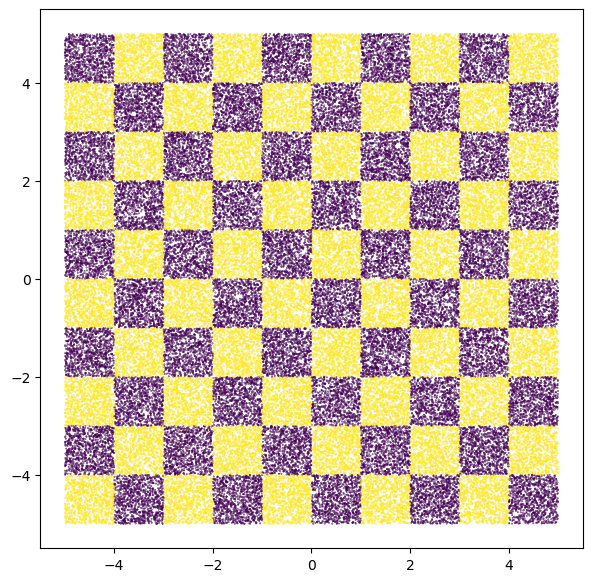

In [44]:
def checker(x,y): 
    if 0 <= x%2 < 1 and 0 <= y%2 < 1:
        res = 1 
    elif 1 <= x%2 < 2 and 1 <= y%2 < 2:
        res = 1
    else: 
        res = 0
    return res

graph_continuous(checker, 5,5)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


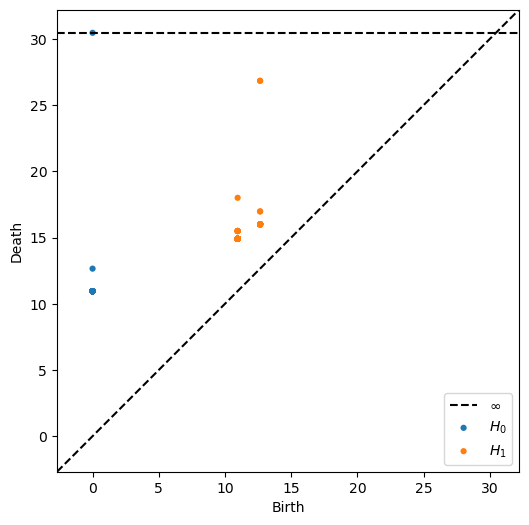

In [51]:
output = pipeline_trans(image_function = checker, num_pixels = 40, window_size = 6, n_isos= 1000, x_translate = 100, y_translate = 100, maxdim=1, coeff=2)
plot_dgms(output)

In [52]:
# there are two outliers
persistent_H1_intervals(output)

[14.183704376220703,
 14.183704376220703,
 7.045548439025879,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715]

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


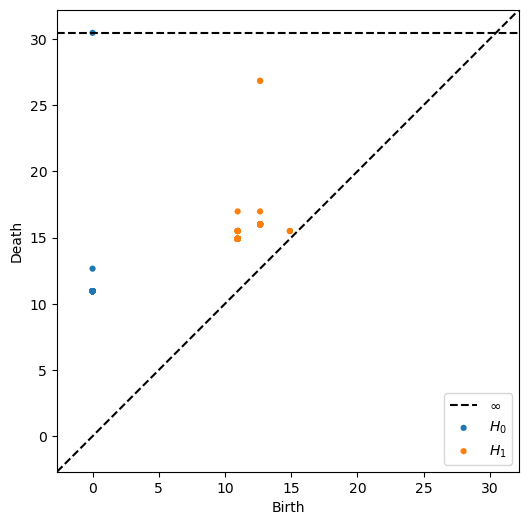

In [53]:
output = pipeline_trans(image_function = checker, num_pixels = 40, window_size = 6, n_isos= 1000, x_translate = 100, y_translate = 100, maxdim=1, coeff=3)
plot_dgms(output)

In [54]:
# there are two outliers
persistent_H1_intervals(output)

[14.183704376220703,
 14.183704376220703,
 6.016110420227051,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715]

In [ ]:
def checker2(x,y): 
    if 0 <= x%4 < 2 and 0 <= y%4 < 2:
        res = 1 
    elif 2 <= x%4 < 4 and 2 <= y%4 < 4:
        res = 1
    else: 
        res = 0
    return res
graph_continuous(checker2, 5,5)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


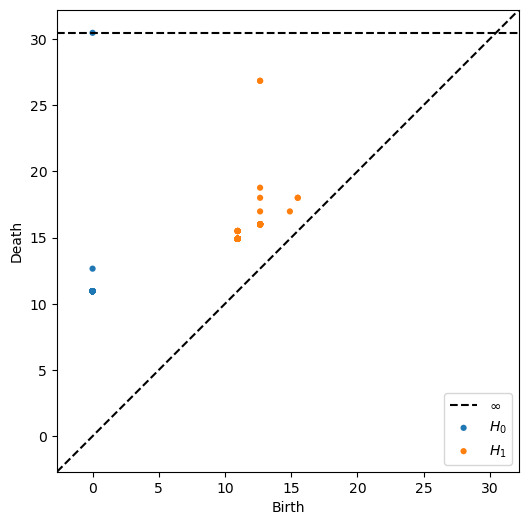

In [55]:
output = pipeline_trans(image_function = checker2, num_pixels = 40, window_size = 6, n_isos= 1000, x_translate = 100, y_translate = 100, maxdim=1, coeff=2)
plot_dgms(output)

In [56]:
persistent_H1_intervals(output)

[14.183704376220703,
 14.183704376220703,
 6.112552642822266,
 5.350889205932617,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715]

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


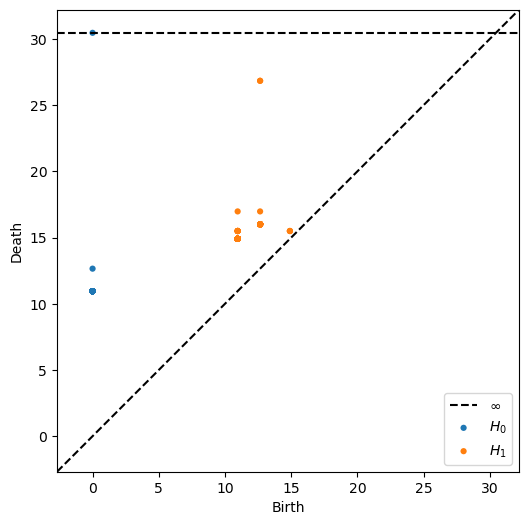

In [66]:
output = pipeline_trans(image_function = checker2, num_pixels = 40, window_size = 6, n_isos= 1000, x_translate = 100, y_translate = 100, maxdim=1, coeff=3)
plot_dgms(output)

In [67]:
persistent_H1_intervals(output)

[14.183704376220703,
 14.183704376220703,
 6.016110420227051,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715,
 4.537482261657715]